# Running YOLO v3 with OpenCV

For running YOLO v3 using OpenCV, we need to download the code and weights of the model first using the following URLs
- Code: `https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip`
- Weights: `https://pjreddie.com/media/files/yolov3.weights`

The code and weights can be downloaded in two ways
1. Load files via Google Drive (works only with Google Colab).
2. Download files directly.

# Load Files via Google Drive
This step will work only with Google Colab.
1. Download the files from the URLs given above to your local computer.
1. Create a folder named `yolov3_opencv` to the root of your Google Drive
1. Unzip the file named `yolo_object_detection.zip` and upload its contents to the folder `yolov3_opencv` in Google Drive.
1. Upload the file `yolov3.weights` to the folder `yolov3_opencv` in your Google Drive

In [1]:
# Connect Colab with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Copy files from Google Drive
# YOLOPATH='/content/gdrive/My Drive/yolov3_opencv'
# !cp -r '$YOLOPATH/coco.names' '$YOLOPATH/yolov3.cfg' '$YOLOPATH/yolov3.weights' .

# Download Files Directly

In [2]:
# Download code
!wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
!unzip yolo_object_detection.zip
!rm -r *.py *.zip *.jpg

--2020-07-04 19:22:32--  https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.24.124.175, 104.24.125.175
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2890443 (2.8M) [application/zip]
Saving to: ‘yolo_object_detection.zip’

yolo_object_detecti 100%[===================>]   2.76M  1.83MB/s    in 1.5s    

2020-07-04 19:22:35 (1.83 MB/s) - ‘yolo_object_detection.zip’ saved [2890443/2890443]

Archive:  yolo_object_detection.zip
  inflating: room_ser.jpg            
  inflating: yolo_object_detection.py  
  inflating: coco.names              
  inflating: yolov3.cfg              


In [3]:
# Download weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-04 19:22:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.85MB/s    in 41s     

2020-07-04 19:23:24 (5.79 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



# Imports
Importing the necessary packages

In [4]:
import cv2
import numpy as np

In [14]:
# If the notebook is being run on Google Colab, run this cell
from google.colab.patches import cv2_imshow

In [6]:
# If the notebook is being run locally, run this cell
# from cv2 import imshow as cv2_imshow

# Load YOLO v3

In [7]:
# Load model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Load Image

In [9]:
# Give path to your image
img_path = '/content/Matt-Damon-The-Bourne-Supremacy-Car-Chase.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detect Objects

In [10]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

In [11]:
# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [12]:
# Apply Non-Maximum Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 10), font, 0.7, color, 1)

# Display Output

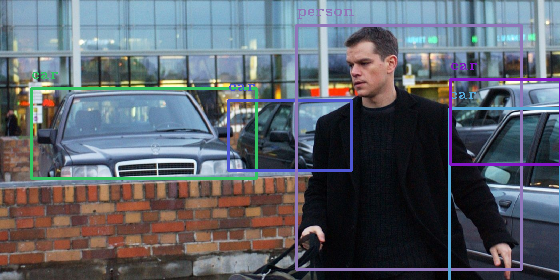

In [15]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imwrite('image_yolo.jpg', img)

True